In [102]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info.operators import Operator
import numpy as np
from typing import List
import galois
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *

### Deustch algoritmas (uždaviniai D1,D2,D3)

1. **(D1)** Parašykite funkciją, kuri pagal užduotą vieno  kubito Deustch funkciją sukonstruoja atitinkamą unitarinę matricą $U_f$ Deustch algoritmui. Deustch funkcija perduodama kaip dviejų simbolių tekstinė eilutė. Pvz. '10' reiškia, kad $f(0)=1$, o $f(1)=0$

In [103]:
def constructUnitary(values:str) -> Operator:
    if values == "00":
        matrix = np.identity(4)
    elif values == "01":
        matrix = np.array([[1, 0, 0, 0], # generalize this
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]])
    elif values == "10":
        matrix = np.array([[0, 1, 0, 0],
                            [1, 0, 0, 0],
                            [0, 0, 1, 0],
                            [0, 0, 0, 1]])
    elif values == "11":
        matrix = np.array([[0, 0, 1, 0],
                            [0, 0, 0, 1],
                            [1, 0, 0, 0],
                            [0, 1, 0, 0]])
    else:
        raise ValueError("Invalid input")
    return Operator(matrix)

2. **(D2)** Panaudokite anksčiau parašytą funkciją nuosavai Deustch algorimo implementacijai qiskit aplinkoje.

In [104]:
def deuchAlgorithm(qc:QuantumCircuit, values:str = "10"):
    qc.x(1)
    # qc.barrier()
    qc.h(0)
    qc.h(1)
    qc.append(constructUnitary(values), [1,0])
    qc.h(0)

qc = QuantumCircuit(2,1)
deuchAlgorithm(qc)
qc.measure(0, 0)

backend = Aer.get_backend('qasm_simulator')

job = execute(qc, backend)
result = job.result()
print (result.get_counts(qc))
qc.draw(output='mpl')

TypeError: issubclass() arg 1 must be a class

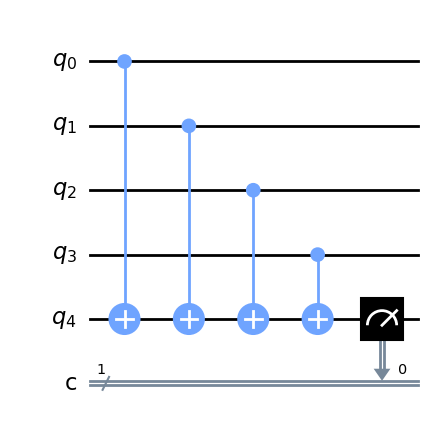

In [ ]:
def onesCount() -> int:
    measureQubit = 4
    qubits = [0,1,2,3]
    qc = QuantumCircuit(5)
    for i in range(len(qubits)):
        qc.cx(i, measureQubit)
    return qc.to_gate()
qc = QuantumCircuit(5,1)
qc.append(onesCount(), [0,1,2,3,4])
qc.measure(4, 0)

backend = Aer.get_backend('qasm_simulator')
qc.decompose().draw(output='mpl')

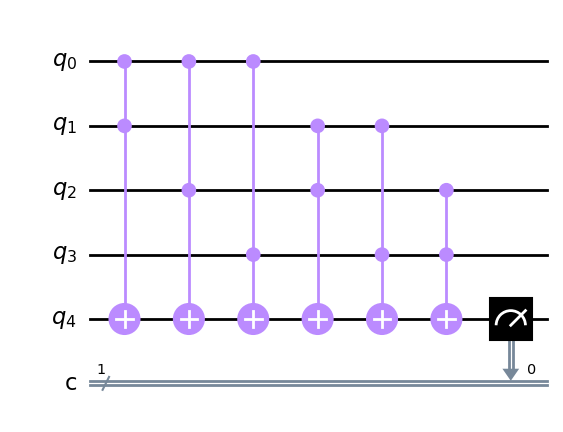

In [ ]:
def countTwos():
    qc = QuantumCircuit(5)
    qubits = [0,1,2,3]
    measureQubit = 4
    for i in range(len(qubits)):
        for j in range(i+1, len(qubits)):
            if list[i] != list[j]:
                qc.ccx(i, j, measureQubit)
    return qc.to_gate()

qc = QuantumCircuit(5,1)
qc.append(countTwos(), [0,1,2,3,4])
qc.measure(4, 0)

backend = Aer.get_backend('qasm_simulator')
qc.decompose().draw(output='mpl')

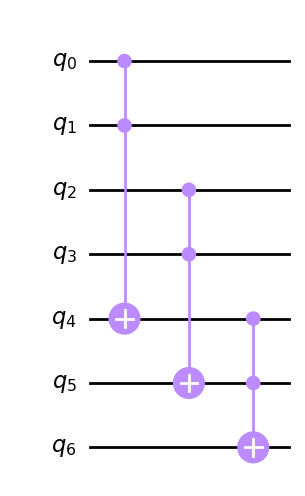

In [ ]:
def ccccx():
    qc = QuantumCircuit(7)
    qubitsToMeasure = [0,1,2,3]
    carryQubits = [4,5]
    measureQubit = 6
    if len(qubitsToMeasure) != 4 and len(carryQubits) != 2:
        raise ValueError("Invalid input")
    for i in range(len(carryQubits)):
        qc.ccx(qubitsToMeasure[i*len(carryQubits)], qubitsToMeasure[i*len(carryQubits)+1], carryQubits[i])
    qc.ccx(carryQubits[0], carryQubits[1], measureQubit)
    return qc.to_gate()

qc = QuantumCircuit(7)
qc.append(ccccx(), [0,1,2,3,4,5,6])
qc.decompose().draw(output='mpl')

1. **(D3)** Sukurkite qiskit schemą, kuri turi 4 įvesties kubitus ir kuri kievienam iš jų lygiagrečiai realizuoja  Deustsch algoritmą. Schema turi paskaičiuoti kiek balansuotų funkcijų buvo panaudota.

balanced:  3


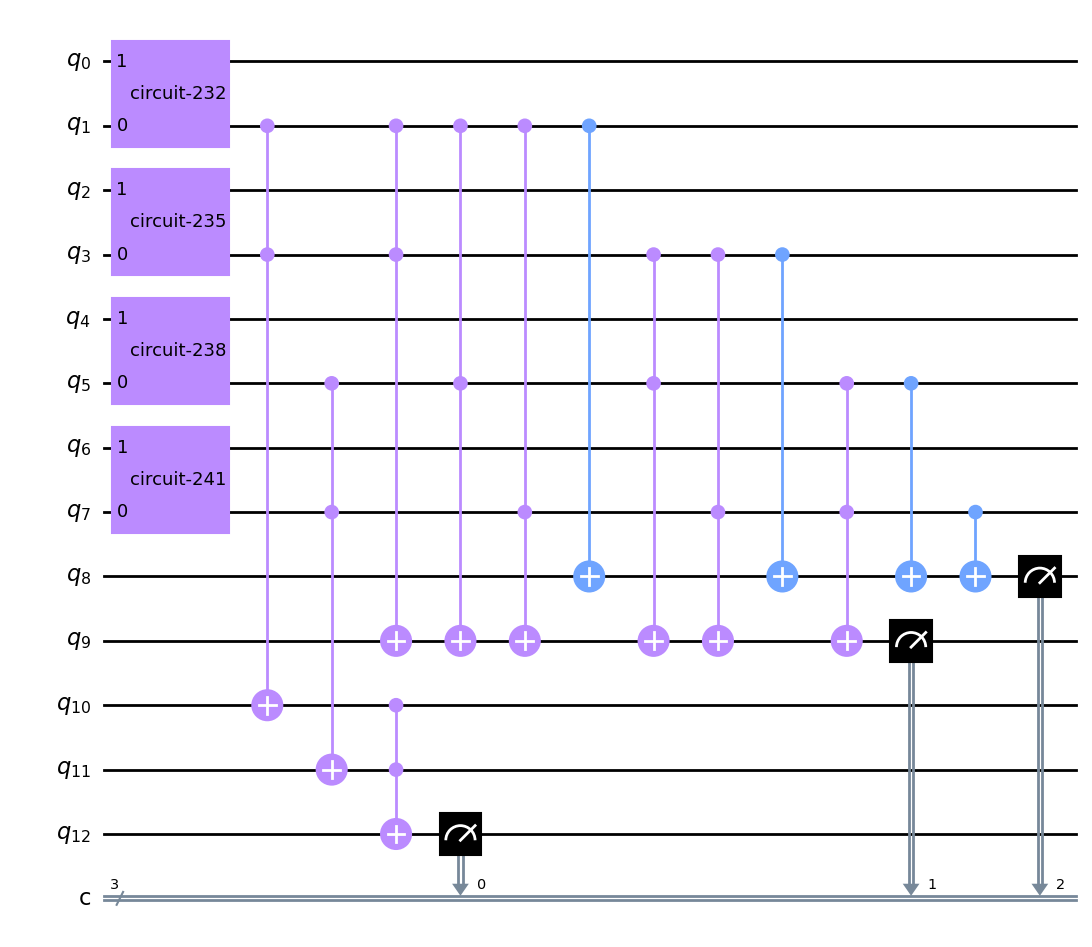

In [ ]:
def deuchtToGate(values:str = "00"):
    qc = QuantumCircuit(2)
    deuchAlgorithm(qc, values)
    return qc.to_gate()

def fourQubitsDeuchAlgorithm(values:List[str] = ["00", "00"]):
    qc = QuantumCircuit(8)
    for i in range(4):
        qc.append(deuchtToGate(values[i]), [2*i+1, 2*i])
    return qc.to_gate()

def countQubitsDeuch(qc:QuantumCircuit,values:List[str] = ["00", "00"]) -> int:
    qc.append(fourQubitsDeuchAlgorithm(values), range(8))
    qc.append(ccccx(), [1,3,5,7,10,11,12])
    qc.append(countTwos(), [1,3,5,7,9])
    qc.append(onesCount(), [1,3,5,7,8])
    qc.measure([12,9,8],[0,1,2])

    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    result = job.result()
    counts = result.get_counts(qc)
    count = int((list(counts.keys())[0])[::-1], 2)
    return count

qc = QuantumCircuit(8+5,3)
functions: List[str] = ["10", "01", "01", "00"]
countBalanced = countQubitsDeuch(qc, functions)
print ("balanced: ", countBalanced) 

qc.decompose().draw(output='mpl')

In [ ]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'110': 1024}


### Deutsch-Jozsa algoritmas (uždaviniai DJ1, DJ2)

1. **(DJ1)** Pagal analogiją su uždaviniu **D1** sukurkite 4 kubitų funkciją, kuri konstruoja $U_f$  matricą Deutsch-Jozsa algoritmui pagal reikšmių tekstinę eilutę. Jeigu Deutsch-Jozsa  funkcija nėra konstanta ar subalansuota reikia grąžinti None. Pvz. eilutė '1111000011110000' atitinka tokią funkciją:


| q3| q2| q1| q0| f |
|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 1 |
| 0 | 0 | 0 | 1 | 1 |
| 0 | 0 | 1 | 0 | 1 |
| 0 | 0 | 1 | 1 | 1 |
| 0 | 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 | 0 |
| 1 | 0 | 0 | 0 | 1 |
| 1 | 0 | 0 | 1 | 1 |
| 1 | 0 | 1 | 0 | 1 |
| 1 | 0 | 1 | 1 | 1 |
| 1 | 1 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 0 | 0 |
| 1 | 1 | 1 | 1 | 0 |

In [ ]:
def constructUnitaryMatrix(input:str)-> Operator:
    ones = 0
    zeros = 0
    size = len(input)*2
    for i in range(len(input)):
        if input[i] == '1':
            ones += 1
        elif input[i] == '0':
            zeros += 1
    if zeros == 0 or ones == 0:
        return Operator(np.identity(size))
    if ones != zeros:
        raise ValueError("Invalid input")
  
    matrix = np.zeros((size, size))
    for i in range(len(input)):
        if input[i] == '1':
            matrix[2*i][2*i+1] = 1
            matrix[2*i+1][2*i] = 1
        elif input[i] == '0':
            matrix[2*i][2*i] = 1
            matrix[2*i+1][2*i+1] = 1
    op = Operator(matrix)
    return op

op = constructUnitaryMatrix("00")
print (op)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


2. (**DJ2**) Panaudokite anksčiau parašytą funkciją nuosavai Deustch-Jozsa algorimo implementacijai qiskit aplinkoje.

counts:  {'1000': 1024}
balanced


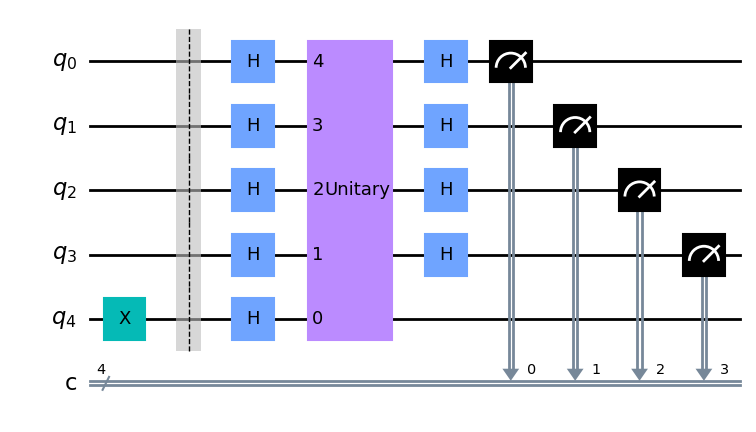

In [ ]:
def deuchJozsaAlgorithm(input:str = "1010101010101010"):
    size = int(np.log2(len(input)))
    qc = QuantumCircuit(size+1, size)
    qc.x(size)
    qc.barrier()
    qc.h(range(size+1))
    qc.append(constructUnitaryMatrix(input), range(size,-1,-1))
    qc.h(range(size))
    qc.measure(range(size), range(size))
    return qc

input = "1010101010101010"
# input = "1001"
# input = "0000000000000000"
qc = deuchJozsaAlgorithm(input)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()
counts = result.get_counts(qc)

print ("counts: ", counts)
if list(counts.keys())[0].count('1') > 0:
    print ("balanced")
else:
    print ("constant")
qc.draw(output='mpl')

# Bernstein-Vazirani problema

1. (**BV1**) Parašykite funkciją, kuri pagal nurodytą bitų  skaičių generuoja atsitiktinę Bernstein-Vazirani funkciją.


2. (**BV2**) Parašykite *klasikinę* funkciją, kuri pagal *n*-bitų  funkciją, kuri užduota kaip tekstinė eilutė (panašiai kaip **DJ1** uždavinyje), patikrina ar ji yra Bernstein-Vazirani funkcija.


In [ ]:
def constructBVGate(gate, qubits = 4) -> QuantumCircuit:
    size = qubits
    qc = QuantumCircuit(size+1, size)
    qc.x(size)
    qc.barrier()
    qc.h(range(size+1))
    qc.append(gate(), range(size+1))
    qc.h(range(size))
    qc.measure(range(size), range(size))
    return qc

class BernsteinVarizaniAlgorithm:
    def __init__(self, size) -> None:
        self.seq = ""
        self.size = size
        self.generateRandomBernsteinVarizaniFunction(size)
    
    def generateRandomBernsteinVarizaniFunction(self, size:int = 4):
        self.seq = ""
        for _ in range(size):
            self.seq += str(np.random.randint(2))

    def classicalBernsteinVarizaniAlgorithm(self, input:str) -> bool:
        if len(input) != len(self.seq):
            raise ValueError("Invalid input")
        for i in range(len(input)):
            if input[i] != self.seq[i]:
                return False
        return True
    
    def quantumBernsteinVarizaniAlgorithm(self):
        qc = QuantumCircuit(self.size+1)
        for i in range(self.size):
            if self.seq[i] == '1':
                qc.cx(i, self.size)
        return qc.to_gate()


True
function: 1010
actual value: 1010


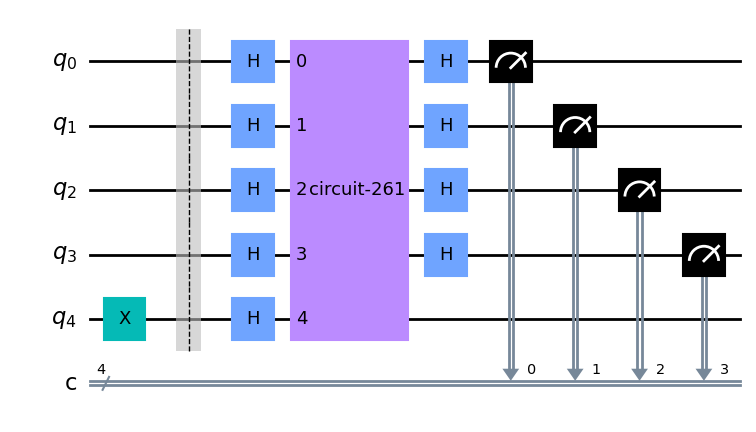

In [ ]:
n = 4
bv = BernsteinVarizaniAlgorithm(size=n)
print (bv.classicalBernsteinVarizaniAlgorithm("1010"))

qc = constructBVGate(bv.quantumBernsteinVarizaniAlgorithm, qubits=n)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()
counts = result.get_counts(qc)
print ("function:",str(list(counts.keys())[0])[::-1])
print ("actual value:",bv.seq)

qc.draw(output='mpl')

# Simons algorithm
(**SA1**) Naudodami vartus X, CNOT, ir CCNOT sukurkite pilną kvantinę shemą 5 bitų Simono  algorimui pagal duotąjį binarinį vektorių **s** Jūsų variantui (13).Funkcijos reikšmes *tinkamai* parinkite savarankiškai.


13. s = 01110;



In [ ]:
def constructTwoToOneFunction(qubits: int=4, s:str = "1010"):
    inputs = {}
    for i in range(2**qubits):
        inputs[i] = 0
    
    count = 0
    for i in range (2**len(s)):
        if inputs[i] == 0 and inputs[i^int(s,2)] == 0:
            inputs[i] = count
            inputs[i^int(s,2)] = count
            count+=1

    return inputs

def constructBlackBox(qubits: int=4, s:str = "1010", verbose:bool = False):
    inputs = constructTwoToOneFunction(qubits, s)
    if verbose:
        for i in range(2**qubits):
            print (i, inputs[i])
    
    qc = QuantumCircuit(2*qubits)

    # solution without using not, cnot, ccnot gates
    queryGate = np.zeros((4**qubits, 4**qubits))
    for i in range(len(inputs)):
        for j in range(2**qubits):
            inputsKeyInBinary = bin((list(inputs.keys()))[i])[2:].rjust(qubits, '0')
            outputsKeyInBinary = bin(j)[2:].rjust(qubits, '0')
            xored = bin(j^(list(inputs.values()))[i])[2:].rjust(qubits,'0')
            queryGate[int(inputsKeyInBinary+xored, 2)][int(inputsKeyInBinary+outputsKeyInBinary, 2)] = 1
    
    if verbose:
        print (queryGate) 
   
    qc.unitary(queryGate, range(2 * qubits))
    return qc.to_gate()

constructBlackBox(2,"01", verbose=True)

def Simon(qc,n,s):
    qc.h(range(n))
    qc.barrier()
    qc.append(constructBlackBox(n,s), range(2*n-1, -1, -1)) # little endian
    # qc.append(constructBlackBox(n,s), range(2*n))
    qc.barrier()
    qc.h(range(n))
    qc.measure(range(n), range(n)) 

0 1
1 1
2 2
3 2
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


['00000', '00111', '10111', '00000', '10111', '11100', '01010', '11101', '00111', '00000']


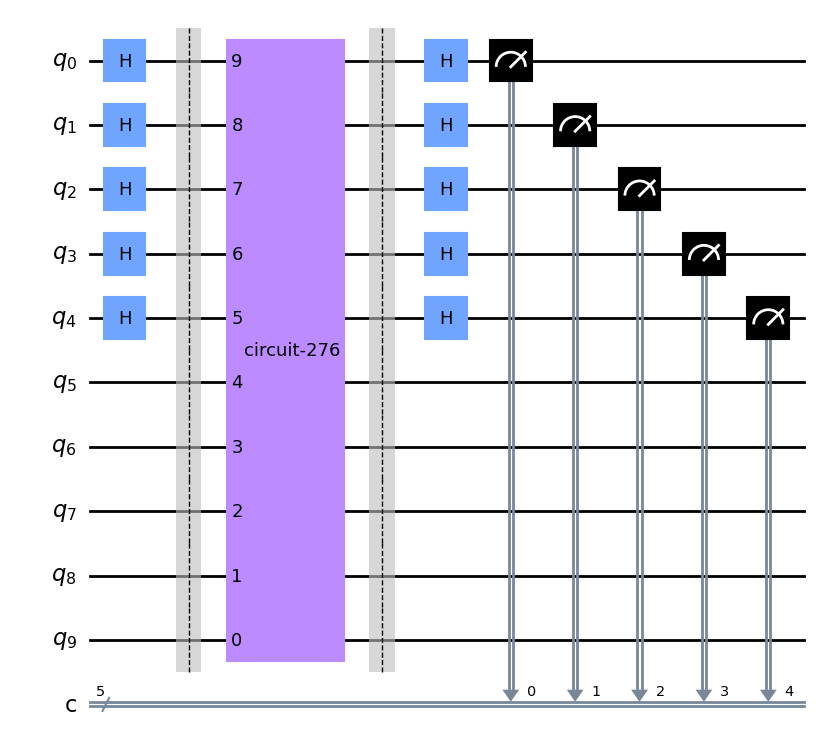

In [137]:
s = "01110"
n = len(s)
simonCircuit = QuantumCircuit(2*n, n)
Simon(simonCircuit, n, s)
backend = Aer.get_backend("qasm_simulator")
job = execute(simonCircuit, backend=backend, shots=2*n, memory=True)
measurements = job.result().get_memory()
print(measurements)

simonCircuit.draw(output='mpl')

In [ ]:
matrix = np.array([list(bitstring) for bitstring in measurements]).astype(int)

nullSpace = galois.GF(2)(matrix).null_space()
print("Null space:")
display(nullSpace)

print("Guess for hidden string s:")
if len(nullSpace) == 0:
    print("0" * len(measurements[0]))
else:
    print("".join(np.array(nullSpace[0]).astype(str)))

Null space:


GF([[0, 1, 1, 1, 0]], order=2)

Guess for hidden string s:
01110


2.(**SA2**) Vadovėlyje „ Noson S. Yanofsky and Mirco A. Mannucci. Quantum computing for computer scientists“ nuo puslapio 190 pateikta Simono algoritmo  analizė konkrečiai funkcijai  $\{0,1\}^3 → \{0,1\}^3$. Naudodamiesi **sympy** moduliu atlkite tokią pat analizę Jūsų pasirinktai funkcijai iš ankstesnės (**SA1**) užduoties.

In [ ]:
init_printing()
phi0,phi1,phi2,phi3 = symbols(r'\phi_0 \phi_1 \phi_2 \phi_3')

$$| \varphi_0 \rangle = |0,0\rangle = |0\rangle \otimes |0 \rangle$$

$$| \varphi_1 \rangle = \frac {\sum_{x\in\{0,1\}^5} |x\rangle} {\sqrt{32}} \otimes | 0 \rangle$$

In [138]:
# Define the basis states
inputs=constructTwoToOneFunction(len(s), s)
# s = '101'
# inputs = {0: 4, 1: 1, 2: 5, 3: 7, 4: 1, 5: 4, 6: 7, 7: 5}

# Define the coefficient and construct the state
coeff = 1 / sqrt(2**len(s))
state = Eq(Ket(phi1),coeff * sum(TensorProduct(Ket(bin(list(inputs.keys())[i])[2:].rjust(len(s),'0')), Ket('00000')) for i in range(len(inputs))))

# Print the state
state

In [139]:
# Define the basis states
# Define the coefficient and construct the state
coeff = 1 / sqrt(2**len(s))
state = Eq(Ket(phi1),coeff * sum(TensorProduct(Ket(bin(list(inputs.keys())[i])[2:].rjust(len(s),'0')), Ket(bin(list(inputs.values())[i])[2:].rjust(len(s),'0'))) for i in range(len(inputs))))

# Print the state
state

$$|\varphi_3\rangle= \frac {\sum_{x \in \{0,1\}^5} \sum_{z \in \{0,1\}^5} (-1)^{\langle z, x \rangle} |z\rangle \otimes |f(x)\rangle} {32} $$

In [146]:
total = None
with evaluate(True):

    for i in range(len(inputs)):
        for j in range(len(inputs)):
            x = [int(l) for l in list(bin(i)[2:].rjust(len(s),'0'))]
            z = [int(l) for l in list(bin(j)[2:].rjust(len(s),'0'))]
            x = np.array(x)
            z = np.array(z)
            mult = (-1)**np.dot(x,z)
            if total is None:
                total = mult*TensorProduct(Ket(bin(list(inputs.keys())[j])[2:].rjust(len(s),'0')), Ket(bin(list(inputs.values())[i])[2:].rjust(len(s),'0')))
            else:
                total += mult*TensorProduct(Ket(bin(list(inputs.keys())[j])[2:].rjust(len(s),'0')), Ket(bin(list(inputs.values())[i])[2:].rjust(len(s),'0')))

    total = total/ 2**len(s)
total

$$\frac{1}{32} (2 {|00000\rangle}\otimes ({|00001\rangle} + {|00010\rangle} + {|00011\rangle} + {|00100\rangle} + {|00101\rangle} + {|00110\rangle} + {|00111\rangle} + {|01000\rangle} + {|01001\rangle} +  {|01010\rangle} +  {|01011\rangle} + {|01100\rangle} + {|01101\rangle} + {|01110\rangle} + {|01111\rangle} + {|10000\rangle})+$$
$$2 {|00001\rangle}\otimes(- {|00001\rangle} + {|00010\rangle} - {|00011\rangle} + {|00100\rangle} - {|00101\rangle} + {|00110\rangle} - {|00111\rangle} + {|01000\rangle} + {|01001\rangle} - {|01010\rangle} +  {|01011\rangle} -  {|01100\rangle} +  {|01101\rangle} -  {|01110\rangle} + {|01111\rangle} - {|10000\rangle})+$$
$$ 2 {|00110\rangle}\otimes({|00001\rangle} - {|00010\rangle} -  {|00011\rangle} - {|00100\rangle} - {|00101\rangle} + {|00110\rangle} + {|00111\rangle} + {|01000\rangle} + {|01001\rangle} + {|01010\rangle} -  {|01011\rangle} -  {|01100\rangle} -  {|01101\rangle} -  {|01110\rangle} +  {|01111\rangle} +  {|10000\rangle})+$$
$$2 {|00111\rangle}\otimes ( - {|00001\rangle} - {|00010\rangle} + {|00011\rangle} - {|00100\rangle} + {|00101\rangle} + {|00110\rangle} - {|00111\rangle} + {|01000\rangle} + {|01001\rangle} - {|01010\rangle} - {|01011\rangle} + {|01100\rangle} - {|01101\rangle} + {|01110\rangle} + {|01111\rangle} - {|10000\rangle})+$$
$$2 {|01010\rangle}\otimes(+ {|00001\rangle} - {|00010\rangle} - {|00011\rangle} + {|00100\rangle} + {|00101\rangle} - {|00110\rangle} - {|00111\rangle} + {|01000\rangle} + {|01001\rangle} + {|01010\rangle} - {|01011\rangle} - {|01100\rangle} + {|01101\rangle} + {|01110\rangle} - {|01111\rangle} - {|10000\rangle})+$$
$$2 {|01011\rangle}\otimes(- {|00001\rangle} - {|00010\rangle} + {|00011\rangle} + {|00100\rangle} - {|00101\rangle} - {|00110\rangle} + {|00111\rangle} + {|01000\rangle} + {|01001\rangle} - {|01010\rangle} - {|01011\rangle} + {|01100\rangle} + {|01101\rangle} - {|01110\rangle} - {|01111\rangle} + {|10000\rangle})+$$
$$2 {|01100\rangle}\otimes(+ {|00001\rangle} + {|00010\rangle} + {|00011\rangle} - {|00100\rangle} - {|00101\rangle} - {|00110\rangle} - {|00111\rangle} + {|01000\rangle} + {|01001\rangle} + {|01010\rangle} + {|01011\rangle} + {|01100\rangle} - {|01101\rangle} - {|01110\rangle} - {|01111\rangle} - {|10000\rangle})+$$
$$2 {|01101\rangle}\otimes( - {|00001\rangle} + {|00010\rangle} - {|00011\rangle} - {|00100\rangle} + {|00101\rangle} - {|00110\rangle} + {|00111\rangle} + {|01000\rangle} + {|01001\rangle} - {|01010\rangle} + {|01011\rangle} - {|01100\rangle} - {|01101\rangle} + {|01110\rangle} - {|01111\rangle} + {|10000\rangle})+$$
$$2 {|10000\rangle}\otimes( + {|00001\rangle} + {|00010\rangle} + {|00011\rangle} + {|00100\rangle} + {|00101\rangle} + {|00110\rangle} + {|00111\rangle} + {|01000\rangle} - {|01001\rangle} - {|01010\rangle} - {|01011\rangle} - {|01100\rangle} - {|01101\rangle} - {|01110\rangle} - {|01111\rangle} - {|10000\rangle})+$$
$$2 {|10001\rangle}\otimes( - {|00001\rangle} + {|00010\rangle} - {|00011\rangle} + {|00100\rangle} - {|00101\rangle} + {|00110\rangle} - {|00111\rangle} + {|01000\rangle} - {|01001\rangle} + {|01010\rangle} - {|01011\rangle} + {|01100\rangle} - {|01101\rangle} + {|01110\rangle} - {|01111\rangle} + {|10000\rangle})+$$
$$2 {|10110\rangle}\otimes ( + {|00001\rangle} - {|00010\rangle} - {|00011\rangle} - {|00100\rangle} - {|00101\rangle} + {|00110\rangle} + {|00111\rangle} + {|01000\rangle} - {|01001\rangle} - {|01010\rangle} + {|01011\rangle} + {|01100\rangle} + {|01101\rangle} + {|01110\rangle} - {|01111\rangle} - {|10000\rangle})+$$
$$2 {|10111\rangle}\otimes( - {|00001\rangle} - {|00010\rangle} + {|00011\rangle} - {|00100\rangle} + {|00101\rangle} + {|00110\rangle} - {|00111\rangle} + {|01000\rangle} - {|01001\rangle} + {|01010\rangle} + {|01011\rangle} - {|01100\rangle} + {|01101\rangle} - {|01110\rangle} - {|01111\rangle} + {|10000\rangle})+$$
$$2 {|11010\rangle}\otimes( + {|00001\rangle} - {|00010\rangle} - {|00011\rangle} + {|00100\rangle} + {|00101\rangle} - {|00110\rangle} - {|00111\rangle} + {|01000\rangle} - {|01001\rangle} - {|01010\rangle} + {|01011\rangle} + {|01100\rangle} - {|01101\rangle} - {|01110\rangle} + {|01111\rangle} + {|10000\rangle})+$$
$$ - 2 {|11011\rangle}\otimes {|00001\rangle} - 2 {|11011\rangle}\otimes {|00010\rangle} + 2 {|11011\rangle}\otimes {|00011\rangle} + 2 {|11011\rangle}\otimes {|00100\rangle} - 2 {|11011\rangle}\otimes {|00101\rangle} - 2 {|11011\rangle}\otimes {|00110\rangle} + 2 {|11011\rangle}\otimes {|00111\rangle} + 2 {|11011\rangle}\otimes {|01000\rangle} - 2 {|11011\rangle}\otimes {|01001\rangle} + 2 {|11011\rangle}\otimes {|01010\rangle} + 2 {|11011\rangle}\otimes {|01011\rangle} - 2 {|11011\rangle}\otimes {|01100\rangle} - 2 {|11011\rangle}\otimes {|01101\rangle} + 2 {|11011\rangle}\otimes {|01110\rangle} + 2 {|11011\rangle}\otimes {|01111\rangle} - 2 {|11011\rangle}\otimes {|10000\rangle})+$$
$$ + 2 {|11100\rangle}\otimes {|00001\rangle} + 2 {|11100\rangle}\otimes {|00010\rangle} + 2 {|11100\rangle}\otimes {|00011\rangle} - 2 {|11100\rangle}\otimes {|00100\rangle} - 2 {|11100\rangle}\otimes {|00101\rangle} - 2 {|11100\rangle}\otimes {|00110\rangle} - 2 {|11100\rangle}\otimes {|00111\rangle} + 2 {|11100\rangle}\otimes {|01000\rangle} - 2 {|11100\rangle}\otimes {|01001\rangle} - 2 {|11100\rangle}\otimes {|01010\rangle} - 2 {|11100\rangle}\otimes {|01011\rangle} - 2 {|11100\rangle}\otimes {|01100\rangle} + 2 {|11100\rangle}\otimes {|01101\rangle} + 2 {|11100\rangle}\otimes {|01110\rangle} + 2 {|11100\rangle}\otimes {|01111\rangle} + 2 {|11100\rangle}\otimes {|10000\rangle})+$$
$$- 2 {|11101\rangle}\otimes {|00001\rangle} + 2 {|11101\rangle}\otimes {|00010\rangle} - 2 {|11101\rangle}\otimes {|00011\rangle} - 2 {|11101\rangle}\otimes {|00100\rangle} + 2 {|11101\rangle}\otimes {|00101\rangle} - 2 {|11101\rangle}\otimes {|00110\rangle} + 2 {|11101\rangle}\otimes {|00111\rangle} + 2 {|11101\rangle}\otimes {|01000\rangle} - 2 {|11101\rangle}\otimes {|01001\rangle} + 2 {|11101\rangle}\otimes {|01010\rangle} - 2 {|11101\rangle}\otimes {|01011\rangle} + 2 {|11101\rangle}\otimes {|01100\rangle} + 2 {|11101\rangle}\otimes {|01101\rangle} - 2 {|11101\rangle}\otimes {|01110\rangle} + 2 {|11101\rangle}\otimes {|01111\rangle} - 2 {|11101\rangle}\otimes {|10000\rangle})
$$
